<h2> <center> Bike Sharing Assignment </center>

<h2> <center> Student Name: Debasish Mondal, Co-hort: May-2022 </center>

#### Problem Statement: Build a multiple linear regression model for the prediction of demand for shared bikes.
#### Businees Goal: To correctly understand how demand varies with different characteristics so that bike companies can adjust their business strategies in line with the demand levels and client expectations.

### Import Libraries

In [231]:
# Import Libraries
import warnings
warnings.filterwarnings(action = 'ignore')

import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor

### Step 1: Data Reading

In [232]:
# Data Reading
bike = pd.read_csv("day.csv")
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


- Since the 'instant' variable acts like the index column, we should make it the index column.

In [233]:
# Change the index column
bike = bike.set_index('instant')
bike.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,
1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [234]:
# Data shape
bike.shape

(730, 15)

In [235]:
# Data types
bike.dtypes

dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [236]:
# Data description
bike.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


### Step 2: Data Quality Checking

#### Step 2.1: Null-value Checking

In [237]:
# Null-valued column check
bike.isnull().sum()

dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

- There is no null-valued columns.

#### Step 2.2: Variable Deletion

- The following columns are deleted for the reasons stated below.
    - 'dteday': This business variable does not have any significant impact on the prediction of bike bookings.
    - 'casual' and 'registered': These two variables are irrelevant for a comprehensive analysis of the business because they are essentially counts of particular types of service users.

In [238]:
bike = bike.drop(['dteday', 'casual', 'registered'], axis = 1)

#### Step 2.3: Data Consistency Checking

In [239]:
# Check the 'day' column
bike['mnth'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

- All the values are between 1 and 12, so no modification is required for the 'mnth' column.

- Since some values in the 'hum' column are equal to 0 (which is absurd in reality), those should be replaced by this column's mean value.

In [240]:
# Detect the 0 valued column
bike[bike['hum'] == 0]

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
instant,,,,,,,,,,,,
69,1,0,3,0,4,1,3,15.952731,19.2834,0.0,17.545759,623


In [241]:
# Replace the 0 value with the column's mean value
bike['hum'][69] = bike['hum'].mean()

In [242]:
# Check the shape of remainder dataframe.
bike.shape

(730, 12)

### Step 3: Exploratory Data Analysis

#### Step 3.1: Categorical Data Analysis

In [243]:
# Ride Count vs. Season
bike['season'] = bike['season'].map({1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'})

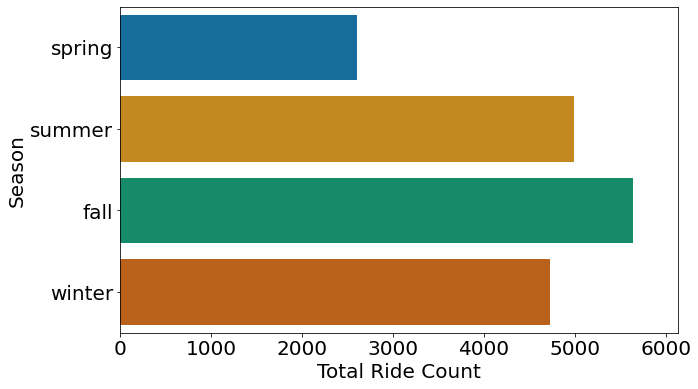

In [244]:
plt.figure(figsize = (10, 6))
ax1 = sns.barplot(data = bike, y = 'season', x = 'cnt', palette = 'colorblind', errwidth = 0)
ax1.set_ylabel('Season', fontsize = 20)
ax1.set_xlabel('Total Ride Count', fontsize = 20)
ax1.tick_params(labelsize = 20)
plt.show()

In [245]:
# Ride Count vs. Month
bike['mnth'] = bike['mnth'].map({1: 'january', 2: 'february', 3: 'march', 4: 'april', 5: 'may', 6: 'june', 7: 'july', 
                                 8: 'august', 9: 'september', 10: 'october', 11: 'november', 12: 'december'})

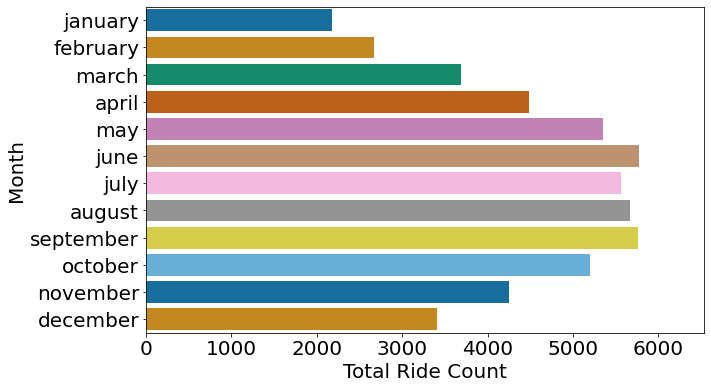

In [246]:
plt.figure(figsize = (10, 6))
ax2 = sns.barplot(data = bike, y = 'mnth', x = 'cnt', palette = 'colorblind', errwidth = 0)
ax2.set_ylabel('Month', fontsize = 20)
ax2.set_xlabel('Total Ride Count', fontsize = 20)
ax2.tick_params(labelsize = 20)
plt.show()

In [247]:
# Ride Count vs. Weekday 
bike['weekday'] = bike['weekday'].map({0: 'sunday', 1: 'monday', 2: 'tuesday', 3: 'wednesday', 4: 'thursday', 5: 'friday', 
                                       6: 'saturday'})

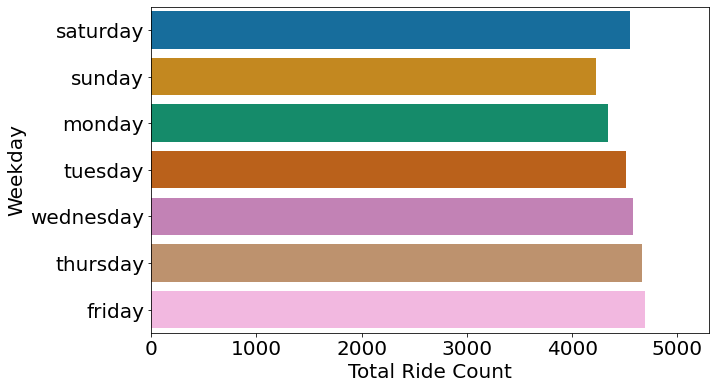

In [248]:
plt.figure(figsize = (10, 6))
ax3 = sns.barplot(data = bike, y = 'weekday', x = 'cnt', palette = 'colorblind', errwidth = 0)
ax3.set_ylabel('Weekday', fontsize = 20)
ax3.set_xlabel('Total Ride Count', fontsize = 20)
ax3.tick_params(labelsize = 20)
plt.show()

In [249]:
# Ride Count vs. Weather Status
bike['weathersit'] = bike['weathersit'].map({1: 'clear', 2: 'mist', 3: 'light', 4: 'heavy'})

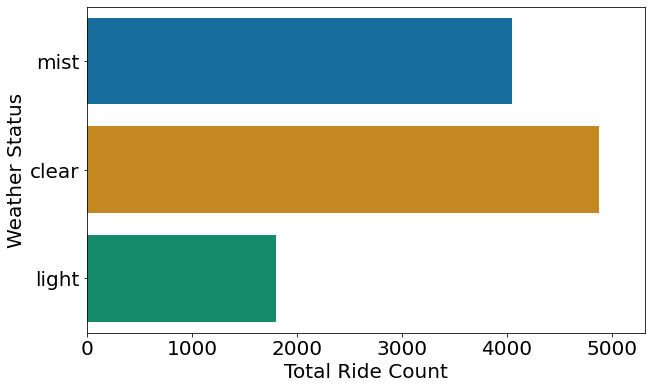

In [250]:
plt.figure(figsize = (10, 6))
ax4 = sns.barplot(data = bike, y = 'weathersit', x = 'cnt', palette = 'colorblind', errwidth = 0)
ax4.set_ylabel('Weather Status', fontsize = 20)
ax4.set_xlabel('Total Ride Count', fontsize = 20)
ax4.tick_params(labelsize = 20)
plt.show()

In [251]:
# Ride Count vs. Year
bike['yr'] = bike['yr'].map({0: '2018', 1: '2019'})

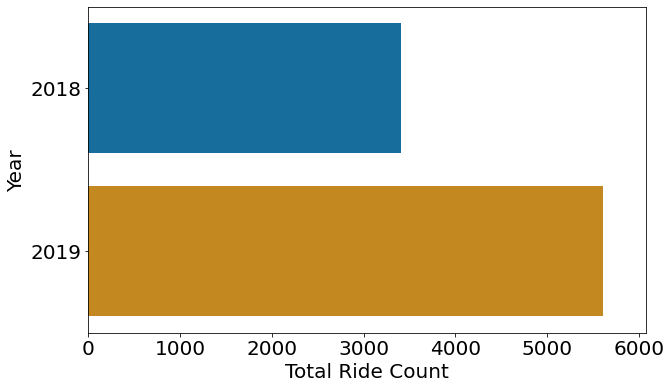

In [252]:
plt.figure(figsize = (10, 6))
ax5 = sns.barplot(data = bike, y = 'yr', x = 'cnt', palette = 'colorblind', errwidth = 0)
ax5.set_ylabel('Year', fontsize = 20)
ax5.set_xlabel('Total Ride Count', fontsize = 20)
ax5.tick_params(labelsize = 20)
plt.show()

In [253]:
# Ride Count vs. Holiday
bike['holiday'] = bike['holiday'].map({0: 'no', 1: 'yes'})

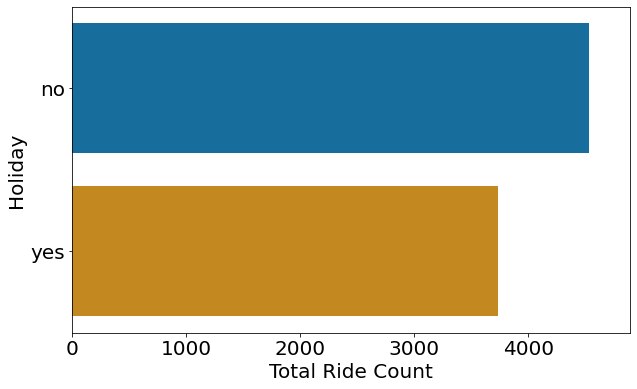

In [254]:
plt.figure(figsize = (10, 6))
ax6 = sns.barplot(data = bike, y = 'holiday', x = 'cnt', palette = 'colorblind', errwidth = 0)
ax6.set_ylabel('Holiday', fontsize = 20)
ax6.set_xlabel('Total Ride Count', fontsize = 20)
ax6.tick_params(labelsize = 20)
plt.show()

In [255]:
# Ride Count vs. Working Day
bike['workingday'] = bike['workingday'].map({0: 'no', 1: 'yes'})

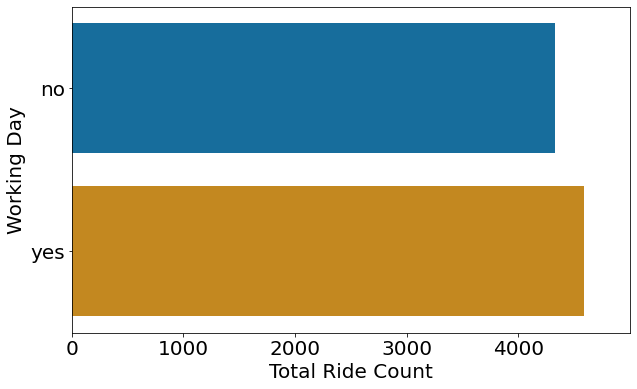

In [256]:
plt.figure(figsize = (10, 6))
ax7 = sns.barplot(data = bike, y = 'workingday', x = 'cnt', palette = 'colorblind', errwidth = 0)
ax7.set_ylabel('Working Day', fontsize = 20)
ax7.set_xlabel('Total Ride Count', fontsize = 20)
ax7.tick_params(labelsize = 20)
plt.show()

#### Step 3.2: Segmented Data Analysis

In [257]:
# Ride Count vs. Temperature
bike['temp_bin'] = pd.cut(bike['temp'], bins = 10, precision = 0)

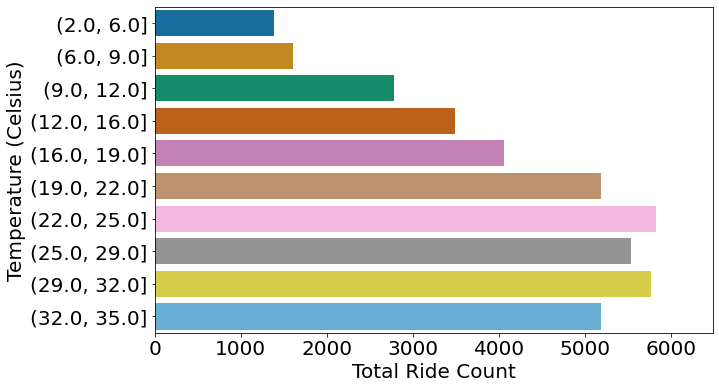

In [258]:
plt.figure(figsize = (10, 6))
ax8 = sns.barplot(data = bike, y = 'temp_bin', x = 'cnt', palette = 'colorblind', errwidth = 0)
ax8.set_ylabel('Temperature (Celsius)', fontsize = 20)
ax8.set_xlabel('Total Ride Count', fontsize = 20)
ax8.tick_params(labelsize = 20)
plt.show()

In [259]:
# Ride Count vs. Feeling Temperature 
bike['atemp_bin'] = pd.cut(bike['atemp'], bins = 10, precision = 0)

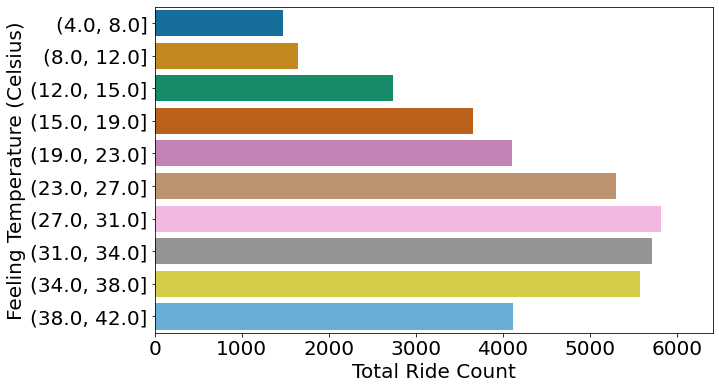

In [260]:
plt.figure(figsize = (10, 6))
ax9 = sns.barplot(data = bike, y = 'atemp_bin', x = 'cnt', palette = 'colorblind', errwidth = 0)
ax9.set_ylabel('Feeling Temperature (Celsius)', fontsize = 20)
ax9.set_xlabel('Total Ride Count', fontsize = 20)
ax9.tick_params(labelsize = 20)
plt.show()

In [261]:
# Ride Count vs. Humidity
bike['hum_bin'] = pd.cut(bike['hum'], bins = 10, precision = 0)

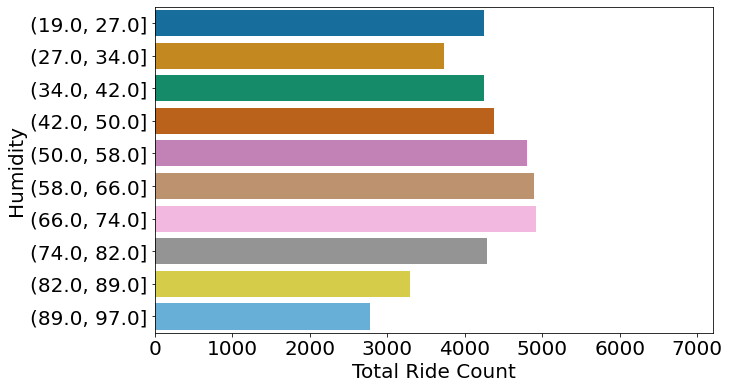

In [262]:
plt.figure(figsize = (10, 6))
ax10 = sns.barplot(data = bike, y = 'hum_bin', x = 'cnt', palette = 'colorblind', errwidth = 0)
ax10.set_ylabel('Humidity', fontsize = 20)
ax10.set_xlabel('Total Ride Count', fontsize = 20)
ax10.tick_params(labelsize = 20)
plt.show()

In [263]:
# Ride Count vs. Wind Speed
bike['windspeed_bin'] = pd.cut(bike['windspeed'], bins = 10, precision = 0)

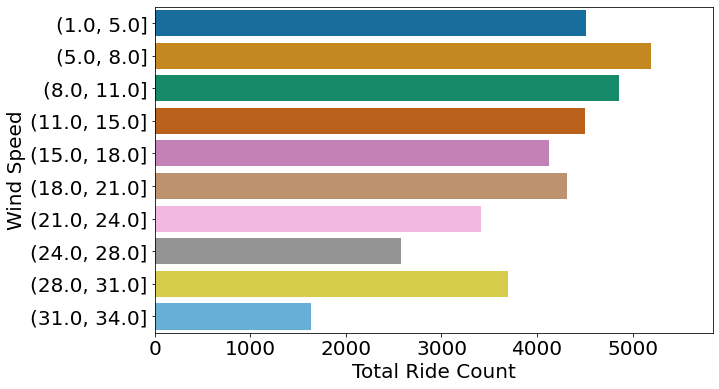

In [264]:
plt.figure(figsize = (10, 6))
ax8 = sns.barplot(data = bike, y = 'windspeed_bin', x = 'cnt', palette = 'colorblind', errwidth = 0)
ax8.set_ylabel('Wind Speed', fontsize = 20)
ax8.set_xlabel('Total Ride Count', fontsize = 20)
ax8.tick_params(labelsize = 20)
plt.show()

### Observations as per the Exploratory Data Analysis
- The number of bookings is highest in the `fall` season.
- The month of `June` has the highest number of bookings.
- The majority of bookings are on `Friday`.
- The number of bookings is highest in the `clear (or few clouds or partly cloudy)` weather.
- The number of bookings is highest in the year `2019`.
- The number of bookings is greatest if it is not a `holiday`.
- The number of bookings is greatest if it is a `working day`.
- The most bookings are made when the `temperature` is between 22.0 and 25.0 degrees Celsius.
- The most bookings are made when the `feeling temperature` is between 27.0 and 31.0 degrees Celsius.
- The most bookings are made when the `humidity` is between 66.0 and 74.0 units.
- The most bookings are made when the `wind speed` is between 5.0 and 8.0 units. 

### Step 4: Model Preparation

#### Step 4.1: Continous Variable Handeling

In [265]:
# List of continuous variables
cont_columns = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

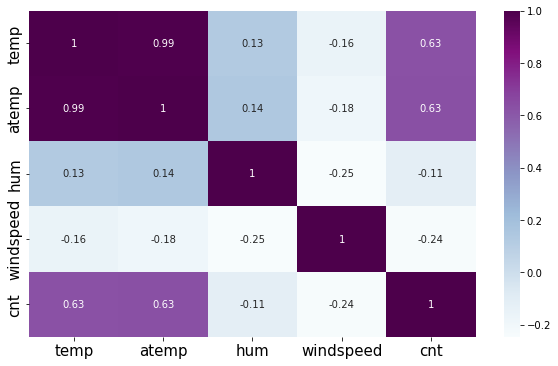

In [266]:
# Check correlations between continuous variables
plt.figure(figsize = (10, 6))
ax1 = sns.heatmap(bike[cont_columns].corr(), cmap = 'BuPu', annot = True)
ax1.tick_params(labelsize = 15)
plt.show()

- `temp` and `atemp` are highly correlated, so we drop the 'temp' variable in order to avoid multicollinearity in the model. Here, 'atemp' signifies the feeling temperature, which is more important for decision making than `temp`. That's why we keep `atemp` in the model.

In [267]:
# Drop the 'temp' column
bike = bike.drop('temp', axis = 1)

In [268]:
# Drop the irrelavant columns created during binning due to continous variables
bike = bike.drop(['temp_bin', 'atemp_bin', 'hum_bin', 'windspeed_bin'], axis = 1)

In [269]:
# To check the shape of remaining dataframe
bike.shape

(730, 11)

#### Step 4.2: Categorical Variable Handeling

In [270]:
# List of variables need to be converted to requisite dummy variables
dummy_columns = ['mnth', 'season', 'weekday', 'weathersit']

In [271]:
# Dummy variable creation
dummy = pd.get_dummies(bike[dummy_columns], drop_first = True)

In [272]:
# Join dummy variables to the original dataframe
bike = pd.concat([bike, dummy], axis = 1)

In [273]:
# Drop extra variables from the original dataframe
bike = bike.drop(['mnth', 'season', 'weekday', 'weathersit'], axis = 1)

In [274]:
# To check the shape of present dataframe
bike.shape

(730, 29)

In [275]:
# Reverse transformation for binary categorical variables in order to use them for model making 
bike['yr'] = bike['yr'].map({'2019': 1, '2018': 0})
bike['workingday'] = bike['workingday'].map({'yes': 1, 'no': 0})
bike['holiday'] = bike['holiday'].map({'yes': 1, 'no': 0})

### Step 4: Model Building

#### Step 4.1: Test-Train Splitting

In [276]:
df_train, df_test = train_test_split(bike, train_size = 0.7, random_state = 100)

In [277]:
# Check the test and train dataframes size
print(df_train.shape)
print(df_test.shape)

(510, 29)
(220, 29)


#### Step 4.2: Rescaling Features

In [278]:
# Define rescaling object
scaler = MinMaxScaler()

In [279]:
# Apply scaling to all the columns except the 'yes-no (0/1)' and 'dummy' Variables
num_vars = ['atemp', 'hum', 'windspeed', 'cnt']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [280]:
# Inspect the scaling 
df_train.describe()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,mnth_august,mnth_december,mnth_february,...,season_summer,season_winter,weekday_monday,weekday_saturday,weekday_sunday,weekday_thursday,weekday_tuesday,weekday_wednesday,weathersit_light,weathersit_mist
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.513156,0.568116,0.320883,0.513499,0.096078,0.084314,0.066667,...,0.247059,0.247059,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.029412,0.345098
std,0.500429,0.157763,0.468282,0.212410,0.177295,0.169803,0.224421,0.294988,0.278131,0.249689,...,0.431725,0.431725,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.169124,0.475867
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.332086,0.428913,0.199179,0.356420,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.529718,0.570553,0.296763,0.518638,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.688457,0.695953,0.414447,0.684710,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


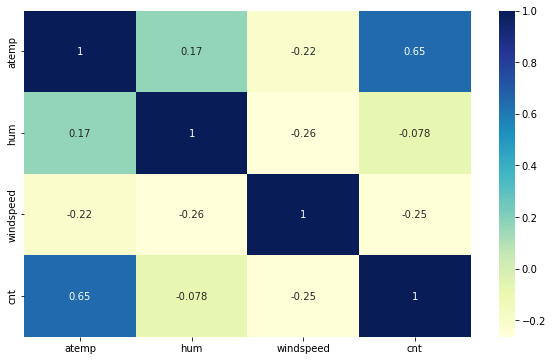

In [281]:
# Let's check the correlation coefficients to see the highest correlation
plt.figure(figsize = (10, 6))
sns.heatmap(df_train[num_vars].corr(), annot = True, cmap = "YlGnBu")
plt.show()

- Clearly, `cnt (i.e. total ride count)` and `atemp (i.e. feeling temperature)` have the highest correlation.

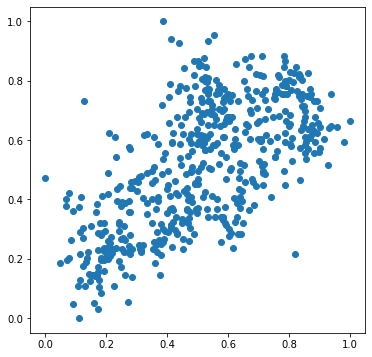

In [282]:
# Visualize the trend between two most correlated variables
plt.figure(figsize = [6, 6])
plt.scatter(df_train.cnt, df_train.atemp)
plt.show()

- Thus, we choose `cnt (i.e. total ride count)` as the response variable.

#### Step 4.3: Model Training

In [283]:
# Dividing the training data into X and Y sets for the model building
y_train = df_train.pop('cnt')
X_train = df_train

In [284]:
# Running Recursive Feature Elimination (RFE) to select top 10 features
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm, 10)
rfe = rfe.fit(X_train, y_train)

In [285]:
# Columns with RFE support
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'atemp', 'hum', 'windspeed', 'mnth_august',
       'mnth_september', 'season_summer', 'season_winter', 'weathersit_light'],
      dtype='object')

In [286]:
# Columns without RFE support
X_train.columns[~rfe.support_]

Index(['workingday', 'mnth_december', 'mnth_february', 'mnth_january',
       'mnth_july', 'mnth_june', 'mnth_march', 'mnth_may', 'mnth_november',
       'mnth_october', 'season_spring', 'weekday_monday', 'weekday_saturday',
       'weekday_sunday', 'weekday_thursday', 'weekday_tuesday',
       'weekday_wednesday', 'weathersit_mist'],
      dtype='object')

#### Model Iteration

In [287]:
# Adding constant  
X_train_rfe = sm.add_constant(X_train[col])

# Running the linear model
lr_model_1 = sm.OLS(y_train, X_train_rfe).fit() 

# Model summary
print(lr_model_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     242.3
Date:                Wed, 10 Aug 2022   Prob (F-statistic):          2.37e-184
Time:                        15:27:29   Log-Likelihood:                 489.63
No. Observations:                 510   AIC:                            -957.3
Df Residuals:                     499   BIC:                            -910.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2272      0.022  

- The `p-values` of all variables are `less than 0.05`, so `next` we need to `investigate` the `VIF values` of all variables.

In [288]:
# Check VIF values
vif = pd.DataFrame()
X = X_train[col]
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

           Features   VIF
3               hum  8.01
2             atemp  7.89
4         windspeed  3.25
0                yr  2.00
7     season_summer  1.83
8     season_winter  1.70
5       mnth_august  1.54
6    mnth_september  1.30
9  weathersit_light  1.13
1           holiday  1.04


- Among all the variables, the `hum` variable has the highest VIF value, which is `greater than 5`, so we may optionally drop it. But still, we `remove` this variable for `better treatment of multicollinearity` in the model.

In [289]:
# Dropping 'holiday' from the list of RFE supported variables
col = col.drop(['hum'])

# Adding constant  
X_train_lm = sm.add_constant(X_train[col])

# Running the linear model
lr_model_2 = sm.OLS(y_train, X_train_lm).fit() 

# Model summary
print(lr_model_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     221.7
Date:                Wed, 10 Aug 2022   Prob (F-statistic):          2.87e-168
Time:                        15:27:38   Log-Likelihood:                 448.84
No. Observations:                 510   AIC:                            -877.7
Df Residuals:                     500   BIC:                            -835.3
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0862      0.018  

- The `p-values` of all variables are `less than 0.05`, so `next` we need to `investigate` the `VIF values` of all variables.

In [290]:
# Check VIF values
vif = pd.DataFrame()
X = X_train[col]
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

           Features   VIF
2             atemp  4.90
3         windspeed  2.96
0                yr  2.00
6     season_summer  1.80
4       mnth_august  1.54
7     season_winter  1.46
5    mnth_september  1.29
8  weathersit_light  1.06
1           holiday  1.04


- Clearly, the VIF value of the 'atemp' variable is the highest among all and that value is less than 5, so we do not need to drop any variable from the model.

-This is the final model because all of the p-values and VIF values are within the acceptable range.

- The best fitted model equation is ->

`cnt` = 0.0862 + (`yr` × 0.2342) - (`holiday` × 0.0813) + (`atemp` × 0.5674) - (`windspeed` × 0.1239) + (`mnth_august` × 0.0538) + (`mnth_september` × 0.1048) + (`season_summer` × 0.0880) + (`season_winter` × 0.1252) - (`weathersit_light` × 0.2454)

### Step 5: Residual Analysis on the Train Data

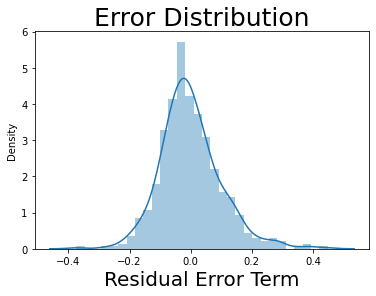

In [291]:
# Check the distribution of error term
y_train_pred = lr_model_2.predict(X_train_lm)
residual = y_train_pred - y_train
sns.distplot(residual)
plt.xlabel('Residual Error Term', fontdict = {'fontsize': 20})
plt.title('Error Distribution', fontdict = {'fontsize': 25})
plt.show()

- Error terms are normally distributed with mean zero.

### Step 6: Model Prediction

In [292]:
# Transform the test dataset
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.describe()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,mnth_august,mnth_december,mnth_february,...,season_summer,season_winter,weekday_monday,weekday_saturday,weekday_sunday,weekday_thursday,weekday_tuesday,weekday_wednesday,weathersit_light,weathersit_mist
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.700000,0.532847,0.551340,0.313293,0.522154,0.059091,0.086364,0.100000,...,0.263636,0.236364,0.127273,0.118182,0.145455,0.163636,0.168182,0.100000,0.027273,0.318182
std,0.500809,0.187620,0.459303,0.217401,0.184403,0.159584,0.219163,0.236333,0.281541,0.300684,...,0.441609,0.425817,0.334038,0.323559,0.353363,0.370789,0.374881,0.300684,0.163248,0.466833
min,0.000000,0.000000,0.000000,0.025950,0.084665,-0.042808,0.048205,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.344870,0.416134,0.198843,0.378595,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.544652,0.535676,0.300126,0.524678,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.713308,0.682271,0.402718,0.677750,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,0.980934,1.002662,0.807474,0.963300,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [293]:
# Dividing the test data into X and Y sets for the model prediction
y_test = df_test.pop('cnt')
X_test = df_test

In [294]:
# Adding constant
X_test_rfe = X_test[col]
X_test_sm = sm.add_constant(X_test_rfe)

In [295]:
# Make prediction
y_test_pred = lr_model_2.predict(X_test_sm)

### Step 7: Model Evaluation

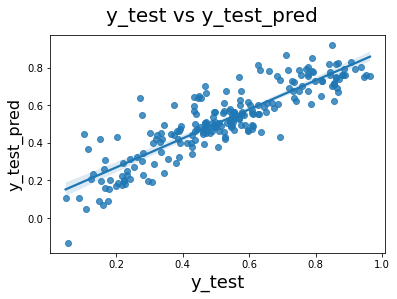

In [296]:
# Plotting y_test and y_pred to understand the spread
fig = plt.figure()
sns.regplot(y_test, y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize = 20)        
plt.xlabel('y_test', fontsize = 18)     
plt.ylabel('y_test_pred', fontsize = 16) 
plt.show()

In [297]:
# Calculate the R2 score
r2 = round(r2_score(y_true = y_test, y_pred = y_test_pred), 3)
print(r2)

0.774


- **Training Data**
    - R<sup>2</sup> value = 0.800
    - Adjusted R<sup>2</sup> value = 0.796
    
- **Test Data**
    - R<sup>2</sup> value = 0.774
    - Adjusted R<sup>2</sup> value = 0.763

- The difference in R<sup>2</sup> values between the train and test datasets is `0.800 - 0.774 = 0.026 (less than 0.5)`. Additionally, the difference in adjusted-R<sup>2</sup> values between the train and test datasets is `0.796 - 0.763 = 0.033 (less than 0.5)`. As a result, using the training data, we effectively built a predictive model.

### Business Decisions

- In terms of achieving business goals, `feeling temperature (i.e. 'atemp' variable)`, `humidity (i.e. 'hum' variable)`, and `year (i.e. 'yr' variable)` are the top three parameters for booking bike rides.